In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.gridspec as gridspec
from collections import Counter
import math
import pandas as pd
from itertools import groupby
np.random.seed(37)
%matplotlib inline

In [3]:
from utils import plot_line

# 1
<font color='red' fontsize=5>
Modify the program CoinTosses to toss a coin n times and print out after
every 100 tosses the proportion of heads minus 1/2. Do these numbers appear
to approach 0 as n increases? Modify the program again to print out, every
100 times, both of the following quantities: the proportion of heads minus 1/2,
and the number of heads minus half the number of tosses. Do these numbers
appear to approach 0 as n increases?
</font>

In [4]:
def e1(num_trials):
    toss_results = np.random.choice([1,0], size=num_trials*100)
    proportions = [np.mean(toss_results[:idx*100])-0.5 for idx in range(1, num_trials+ 1, 1)]
    numbers = [np.sum(toss_results[:idx*100])- ((idx*100)//2) for idx in range(1, num_trials+ 1, 1)]
    return proportions, numbers

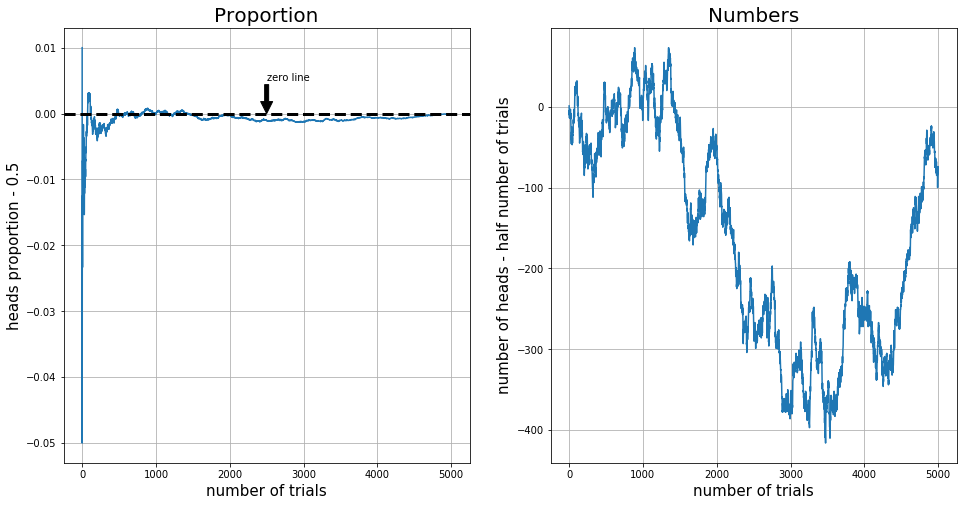

In [5]:
trials = 5000
props, nums = e1(trials)
gridspec.GridSpec(1,2)
plt.figure(figsize=(16,8))
title = ['']
for idx in range(2):
    plt.subplot2grid((1,2), (0,idx), colspan=1, rowspan=1)
    data = props if idx == 0 else nums
    plot_line(
                data=data, 
                title='Proportion' if not idx else 'Numbers',
                xlabel='number of trials',
                ylabel='heads proportion - 0.5' if not idx else 'number of heads - half number of trials',
                hline = {
                            'xy': (trials//2, 0),
                            'pos': 0,
                            'xytext': (trials//2, max(data)/2),
                            'msg': 'zero line'
                        } if not idx else None
             )
plt.show()

<font color='green' face='bold' size=5>
    From above, it can be inferred that as number of trials (n) increases, the [proportion of heads - 0.5] approaches 0, however, [number of heads - number of trial] does not.
</font>